In [9]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

## Helper Functions

In [211]:
def gen_2dnormal(num_points, x_center=0, y_center=0, x_variance=1, y_variance=1):
    return np.random.randn(2, num_points) * np.array([[x_variance, y_variance]]).T + np.array([[x_center, y_center]]).T 

def gen_circle(num_points, x_center = 0, y_center = 0, radius=1):
    circle = (np.random.rand(2, num_points) - np.array([[0.5, 0.5]]).T) * 2 * radius
    circle = circle[:, np.linalg.norm(circle, axis=0) <= radius]
    return circle + np.array([[x_center, y_center]]).T

In [181]:
def setup_graph(x_max=10, y_max=10, ticks=5):
    plt.figure(figsize=(20,20))
    plt.xticks(np.arange(-x_max, x_max + 1, ticks))
    plt.yticks(np.arange(-y_max, y_max + 1, ticks))
    plt.grid(True)
    plt.autoscale(False)
    plt.xlim(-x_max, x_max)
    plt.ylim(-y_max, y_max)

def plot_points(points, color='r', label=''):
    plt.scatter(points[0], points[1], color=color, label=label)
    

In [47]:
def rotate(points, A):
    rotated = A @ points
    return rotated

In [135]:
def PCA(points):
    cov = points @ points.T / (points.shape[1] - 1)
    u, w = np.linalg.eig(cov)
    return u, w, cov

In [174]:
def plot_eig_vectors(eig1, eig2, scale=5):
    eig1 = eig1.copy() 
    eig1 = eig1 * scale
    eig2 = eig2.copy()
    eig2 = eig2 *scale
    plt.plot([0, eig1[0]], [0, eig1[1]], 'g--')
    plt.plot([0, eig2[0]], [0, eig2[1]], 'r--')

## PCA
https://intoli.com/blog/pca-and-svd/

(array([   0.32743164,  108.37174022]), array([[-0.76895556, -0.63930224],
        [ 0.63930224, -0.76895556]]), array([[ 44.48593497,  53.11404281],
        [ 53.11404281,  64.21323689]]))

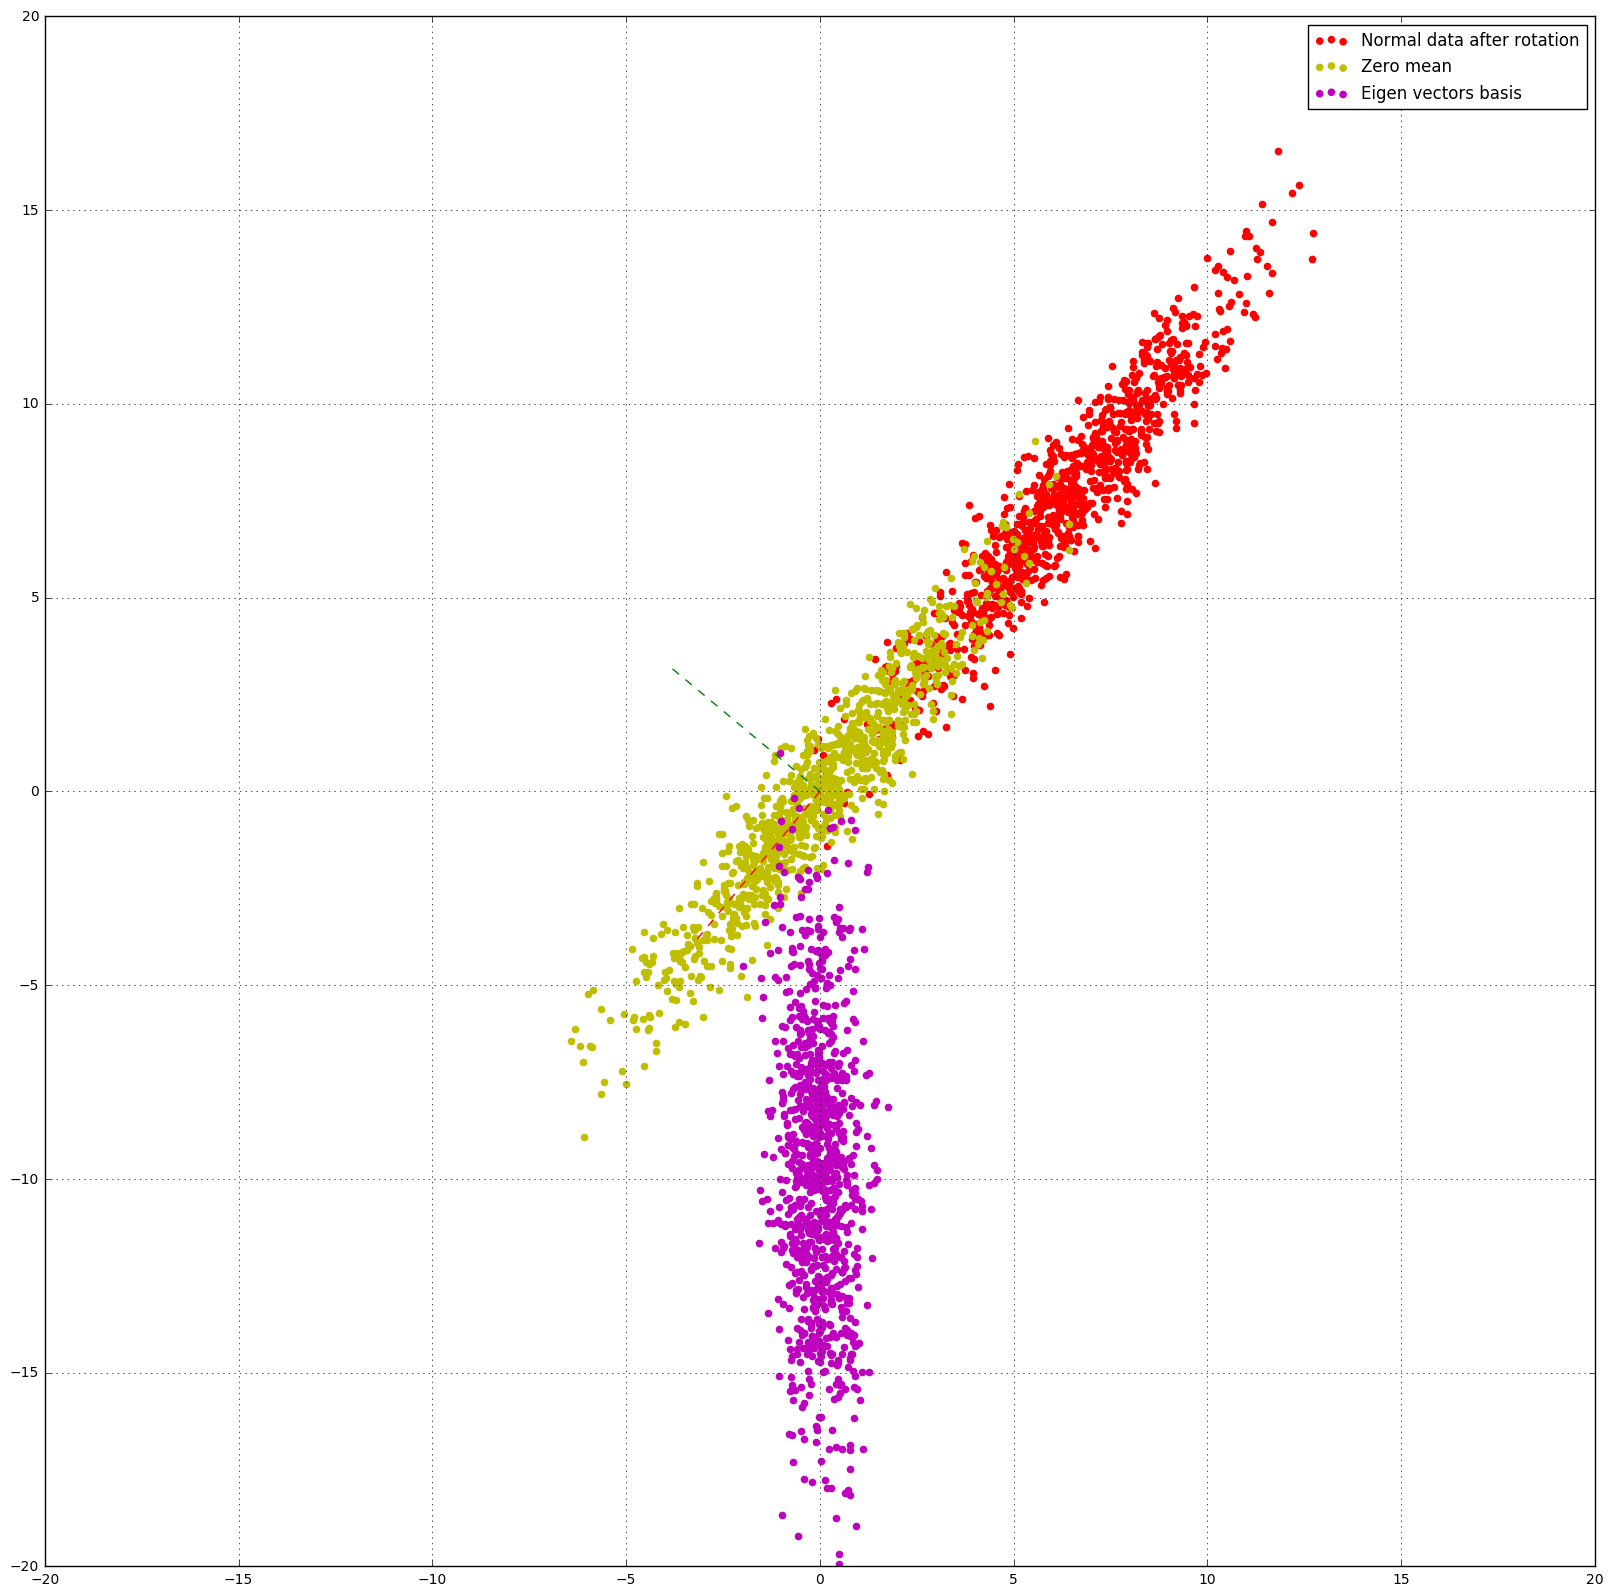

In [182]:
setup_graph(20, 20)

pts = gen_2dnormal(1000, 5, 2.5, 2, 2)
#plot_points(pts, 'g')

A_yinvert = np.array([[1,0],[0,-1]])
pts1 = rotate(pts, A_yinvert)
#plot_points(pts1, 'b')

A_rot = np.array([[1,.5],[1,1]])
pts2 = rotate(pts, A_rot)
plot_points(pts2, 'r', 'Normal data after rotation')

eig_val, eig_vec, cov = PCA(pts2)
plot_eig_vectors(eig_vec[:,0], eig_vec[:,1])

plot_points(pts2 - np.mean(pts2, 1, keepdims=True), 'y', 'Zero mean')
plot_points(eig_vec.T @ pts2, 'm', 'Eigen vectors basis')
plt.legend()

eig_val, eig_vec, cov

In [187]:
np.random.rand?

## SVD

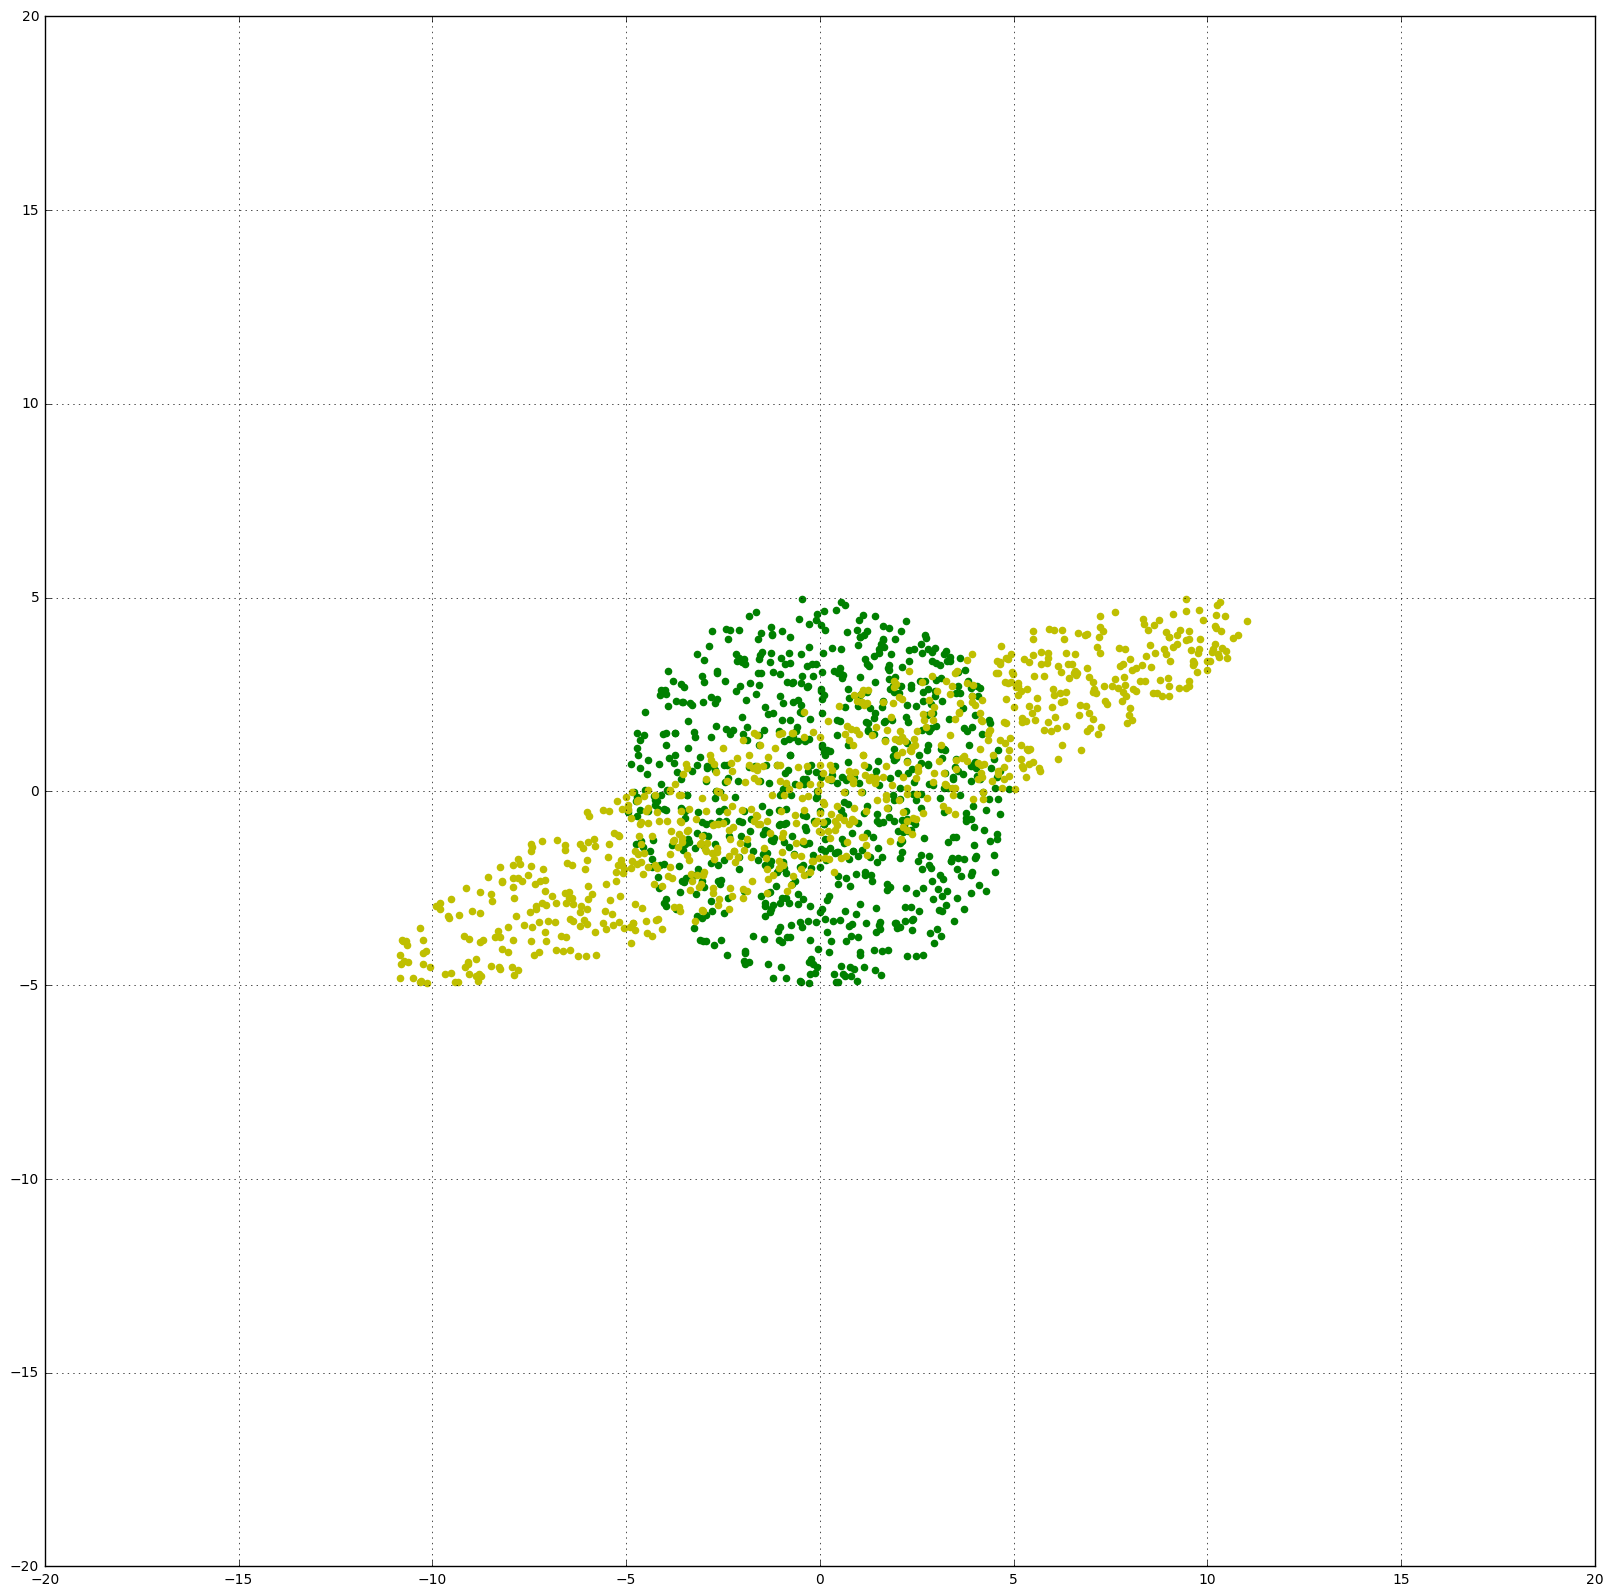

In [213]:
setup_graph(20,20)
cirle_pts = gen_circle(1000, radius=5)
plot_points(cirle_pts, 'g', 'Unit Circle')

A = np.array([[1, 2], [0 ,1]])
ellipse_pts = rotate(cirle_pts, A)
plot_points(ellipse_pts, 'y', 'Rotated Ellipse')


In [210]:
np.linalg.norm(cirle_pts, axis=0) 

array([ 3.83863466,  6.09384639,  2.86004508,  5.4815504 ,  3.57888704,
        3.60469436,  6.45477036,  3.07825255,  2.23390122,  3.18467165,
        1.96734137,  3.39396008,  3.18317637,  6.23771214,  6.32457991,
        5.36930365,  2.79677131,  1.87119254,  5.39280505,  5.2110252 ,
        1.82722244,  2.23529617,  4.46744171,  1.25727122,  5.25605986,
        3.79673722,  4.47130772,  2.74110677,  3.07298874,  2.49156637,
        4.39890952,  3.83706473,  2.47705622,  5.08709675,  4.83140278,
        1.35032238,  3.15414572,  2.25958729,  5.98390587,  5.03322847,
        3.04363338,  2.91294407,  4.5885465 ,  4.07518925,  4.99022538,
        4.9496783 ,  4.75360162,  2.77526947,  5.78379995,  2.48635155,
        4.57628722,  3.51556632,  5.36882185,  1.04260784,  4.20118374,
        4.00693635,  4.20185102,  3.79343813,  6.13428623,  4.94132202,
        0.77912324,  4.69544459,  2.58216464,  2.00948629,  6.27034749,
        0.8639881 ,  1.01559258,  1.02184245,  6.04143809,  5.09